In [1]:
%matplotlib inline
import numpy as np
from scipy import linalg, special
from scipy.spatial import ConvexHull
from math import pi
from matplotlib import pyplot
from matplotlib import rcParams, cm
from scipy.fftpack import fft, dct
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [50]:
import numba
from numba import jit

In [7]:
h(2,1)

0.0

In [14]:
def h(m, gamma): 
    g_1, g_2 = 1 - gamma, 2 - gamma
    return -0.5*(m-2)**g_1 - 1.5*m**g_1 + 1.5*(m-1)**g_1 + 0.5*(m+1)**g_1 + ((m+1)**g_2 - 3*m**g_2 + 3*(m-1)**g_2
                                                                            -(m-2)**g_2)/g_2

def calc_lambda(n, gamma, m):
    '''
    n: n-th time step
    m: number of grids for plotting
    alpha: alpha
    '''
    c = np.zeros(n+1)
    k = np.arange(1, n+1)
    
    g_1, g_2 = 1-gamma, 2-gamma
    b = np.zeros(n-1)
    b[0] = 0.5 + 1/g_2
    b[1] = -1.5 + 2**g_1/2 - 3/g_2 + 2**g_2/g_2
    
    if gamma == 1:
        c[n-1] = 0.5
        c[n] = 2
    else:
        b[2:] = h(np.arange(2, n-1), gamma)
        c[3:] = b[n-2:0:-1]
        c[2] = -0.5*n**g_1 - 0.5*(n+1)**g_1 - (n**g_2 - (n+1)**g_2)/g_2 + h(n-1,gamma)
        c[1] = h(n,gamma) + 1.5*n**g_1 + 1.5*(n+1)**g_1 + 3*(n**g_2 - (n+1)**g_2)/g_2
        c[0] = -0.5*(n-1)**g_1 - 1.5*(n+1)**g_1 - (n-1)**g_2/g_2 + (n+1)**g_2/g_2
        
    xi_n = np.exp(1.j*np.linspace(0,2*np.pi,m)[:,None]*(np.arange(0,n+1)[None,:]-n-1))
    return (xi_n.dot(c) + b[0])

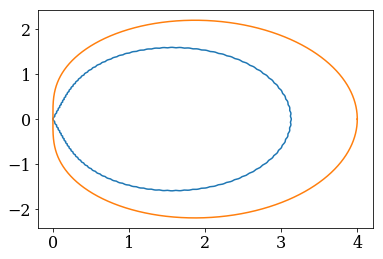

In [15]:
lambda_ = calc_lambda(100, 0.8, 10000)
lambda_one = calc_lambda(100, 1, 10000)
pyplot.plot(lambda_.real, lambda_.imag, lambda_one.real, lambda_one.imag)
pyplot.savefig('test1.pdf')

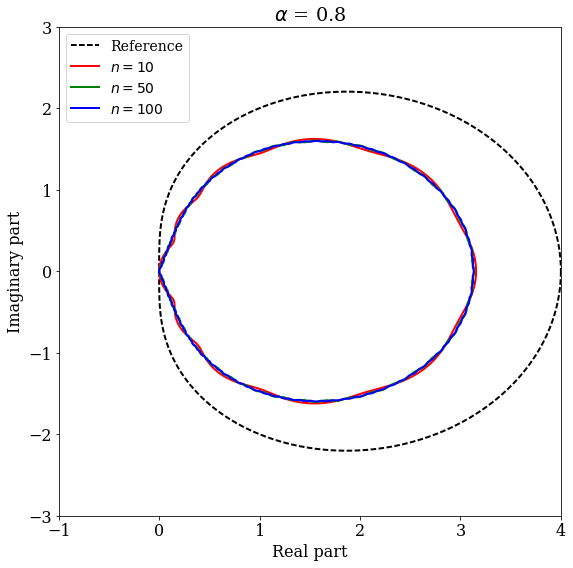

In [16]:
lambda_one = calc_lambda(10, 1, 10000)
lambda_10 = calc_lambda(10, 0.8, 10000)
lambda_50 = calc_lambda(50, 0.8, 10000)
lambda_100 = calc_lambda(100, 0.8, 10000)



fig = pyplot.figure(figsize=(9,9));
ax = pyplot.axes(xlim=(-1,4),ylim=(-3,3),
                 xlabel=(r'Real part'),ylabel=(r'Imaginary part'),
                 title=(r'$\alpha$ = 0.8'));
line0, = ax.plot(lambda_one.real,lambda_one.imag,'k--',lw=2,label=r'Reference');
line1, = ax.plot(lambda_10.real,lambda_10.imag,'r',lw=2,label=r'$n=10$');
line2, = ax.plot(lambda_50.real,lambda_50.imag,'g',lw=2,label=r'$n=50$');
line3, = ax.plot(lambda_100.real,lambda_100.imag,'b',lw=2,label=r'$n=100$');
pyplot.legend(fontsize=14);

pyplot.savefig('a.pdf')

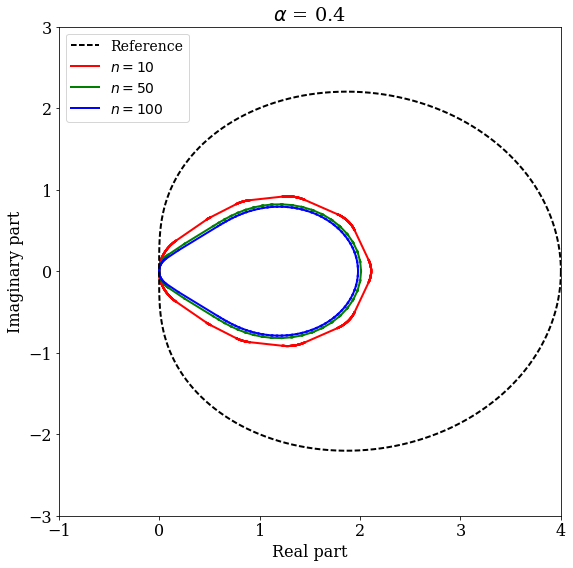

In [18]:
lambda_one = calc_lambda(10, 1, 10000)
lambda_10 = calc_lambda(10, 0.4, 10000)
lambda_50 = calc_lambda(50, 0.4, 10000)
lambda_100 = calc_lambda(100, 0.4, 10000)

a = np.zeros((lambda_10.shape[0], 2))
a[:,0], a[:,1] = lambda_10.real, lambda_10.imag
hull_10 = ConvexHull(a)

b = np.zeros((lambda_50.shape[0], 2))
b[:,0], b[:,1] = lambda_50.real, lambda_50.imag
hull_50 = ConvexHull(b)

c = np.zeros((lambda_100.shape[0], 2))
c[:,0], c[:,1] = lambda_100.real, lambda_100.imag
hull_100 = ConvexHull(c)

fig = pyplot.figure(figsize=(9,9));
ax = pyplot.axes(xlim=(-1,4),ylim=(-3,3),
                 xlabel=(r'Real part'),ylabel=(r'Imaginary part'),
                 title=(r'$\alpha$ = 0.4'));

for simplex in hull_10.simplices:
    line1, = ax.plot(a[simplex,0], a[simplex,1], 'r', lw=2)
    
for simplex in hull_50.simplices:
    line2, = ax.plot(b[simplex,0], b[simplex,1], 'g', lw=2)
    
for simplex in hull_100.simplices:
    line3, = ax.plot(c[simplex,0], c[simplex,1], 'b', lw=2)

line0, = ax.plot(lambda_one.real,lambda_one.imag,'k--',lw=2);

pyplot.legend([line0, line1, line2, line3], [r'Reference',r'$n=10$',r'$n=50$',r'$n=100$'],fontsize=14);

pyplot.savefig('b.pdf')

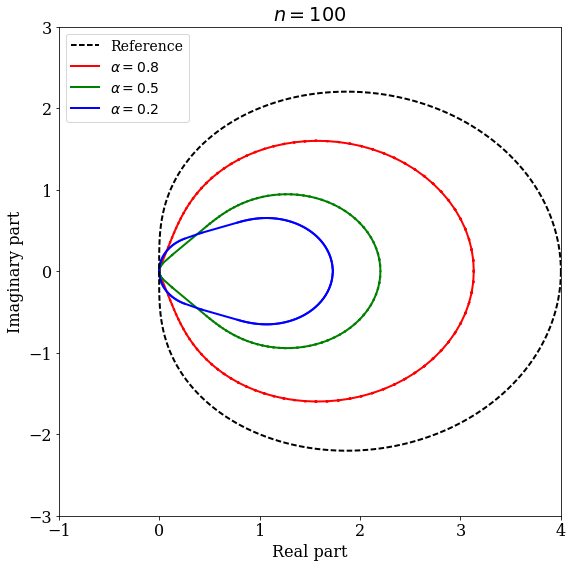

In [19]:
lambda_one = calc_lambda(100, 1, 10000)
lambda_08 = calc_lambda(100, 0.8, 10000)
lambda_05 = calc_lambda(100, 0.5, 10000)
lambda_02 = calc_lambda(100, 0.2, 10000)

a = np.zeros((lambda_08.shape[0], 2))
a[:,0], a[:,1] = lambda_08.real, lambda_08.imag
hull_08 = ConvexHull(a)

b = np.zeros((lambda_05.shape[0], 2))
b[:,0], b[:,1] = lambda_05.real, lambda_05.imag
hull_05 = ConvexHull(b)

c = np.zeros((lambda_100.shape[0], 2))
c[:,0], c[:,1] = lambda_02.real, lambda_02.imag
hull_02 = ConvexHull(c)

fig = pyplot.figure(figsize=(9,9));
ax = pyplot.axes(xlim=(-1,4),ylim=(-3,3),
                 xlabel=(r'Real part'),ylabel=(r'Imaginary part'),
                 title=(r'$n=100$'));

for simplex in hull_08.simplices:
    line1, = ax.plot(a[simplex,0], a[simplex,1], 'r', lw=2)
    
for simplex in hull_05.simplices:
    line2, = ax.plot(b[simplex,0], b[simplex,1], 'g', lw=2)
    
for simplex in hull_02.simplices:
    line3, = ax.plot(c[simplex,0], c[simplex,1], 'b', lw=2)

line0, = ax.plot(lambda_one.real,lambda_one.imag,'k--',lw=2);

pyplot.legend([line0, line1, line2, line3], [r'Reference',r'$\alpha=0.8$',r'$\alpha=0.5$',r'$\alpha=0.2$'],fontsize=14);

pyplot.savefig('c.pdf')

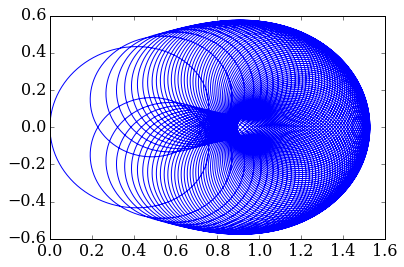

In [9]:
lambda_ = calc_lambda(100, 0.2, 0.01, 10000)


pyplot.plot(lambda_.real, lambda_.imag)
pyplot.savefig('test1.pdf')

In [10]:
from scipy.spatial import ConvexHull

In [14]:
a = np.zeros((lambda_.shape[0], 2))

In [16]:
a[:,0], a[:,1] = lambda_.real, lambda_.imag

In [18]:
hull = ConvexHull(a)

NameError: name 'ConvexHull' is not defined

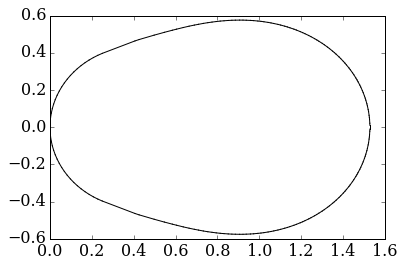

In [20]:
for simplex in hull.simplices:
    pyplot.plot(a[simplex,0], a[simplex,1], 'k-')
pyplot.show()